# Predicting loan Eligibility

## Project Overview
#### Introduction
 This project builds a machine learning model that will identify customers that are eligible for loan or not. The details of the dataset are inforamtion provided by customers while filling out an eligibility form for loan with an Housing Finance company. Dataset used in the project can be download here https://drive.google.com/drive/folders/17XddaPPdM9wXrzRPhYjcmT4MsaRia_bw?usp=share_link
 
 #### Dataset Key Information :
  - Loan_ID --------- Unique Loan ID
  - Gender ---------- Male / Female
  - Married --------- Applicant marriesd (Y/N)
  - Dependents ------- Number of dependents
  - Education -------- Applicant Education (Graduate/ Under Graduate)
  - Self_Employed ---- Self-employed (Y/N)
  - ApplicantIncome --- Applicant income
  - CoapplicantIncome --- Coapplicant income
  - LoanAmount ----------- Loan amount in thousands
  - Loan_Amount_Term ------ Term of a loan in months
  - Credit_History --------- Credit history meets guidelines
  - Property_Area ---------- Urban/ Semi-Urban/Rural
  - Loan_Status ------------ Loan approved (Y/N)
  
#### Type of problem
This is a supervised classification machine learning problem

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Steps:
#1. Load the dataset
#2. check for missing values and inconsistencies in data set
#3. Data Processing
#4 select the best features in the dataset
#5 split data set into training and testing
#6 Normalization
#7 Fit the model
#8 Evaluate the model
#9 Fine tunning
#8 Predict the test data set

In [3]:
# import dataset
df = pd.read_csv("loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Make a copy of the original dataframe
df1 = df.copy()

### Data Cleaning

In [5]:
# change columns names to lowercase
def change_column_name(col):
    return col.lower()

In [6]:
header = []
for col in df1.columns:
    new_header = header.append(col.lower())
df1.columns = header

In [7]:
# Rename selected column names
df1 = df1.rename(columns={"applicantincome" : "applicant_income", "coapplicantincome" : "coapplicant_income", "loanamount" : "loan_amount"})

In [8]:
df1.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
# Checking for null values
df1.isna().sum()

loan_id                0
gender                13
married                3
dependents            15
education              0
self_employed         32
applicant_income       0
coapplicant_income     0
loan_amount           22
loan_amount_term      14
credit_history        50
property_area          0
loan_status            0
dtype: int64

In [10]:
df1.shape

(614, 13)

In [11]:
# Get the percentage of null values in the columns
# Because of the small size of the dataset I will fill the missing values with mean or the mode for string data type

sum_null = df1.isnull().sum()
percentage_null = round(sum_null / len(df1) * 100, 2)
percentage_null

loan_id               0.00
gender                2.12
married               0.49
dependents            2.44
education             0.00
self_employed         5.21
applicant_income      0.00
coapplicant_income    0.00
loan_amount           3.58
loan_amount_term      2.28
credit_history        8.14
property_area         0.00
loan_status           0.00
dtype: float64

In [12]:
# This function fills the the missing values with mean, or mode according to data types respectively
def fill_missing_values(col):
    if col.dtype == np.dtype(int):
        return col.fillna(col.median())
    elif col.dtype == np.dtype(float):
        return col.fillna(col.median())
    elif col.dtype == np.dtype("O"):
        return col.fillna(col.mode()[0])
    else:
        return col

In [13]:
# Apply the function
for col in df1.columns:
    df1[col] = fill_missing_values(df1[col])

In [14]:
# Check that missing values has been filled
df1.isna().sum()

loan_id               0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_amount_term      0
credit_history        0
property_area         0
loan_status           0
dtype: int64

In [15]:
# Checking random five samples
df1.sample(5)

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
319,LP002050,Male,Yes,1,Graduate,Yes,10000,0.0,155.0,360.0,1.0,Rural,N
234,LP001778,Male,Yes,1,Graduate,No,3155,1779.0,140.0,360.0,1.0,Semiurban,Y
60,LP001205,Male,Yes,0,Graduate,No,2500,3796.0,120.0,360.0,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,360.0,0.0,Urban,N


Getting a brief statistics of the numerical columns
We can see that the mean and the median are not so far apart meaning that we might not have much skewness of values in the columns
But the maxixmum values in "loan_amount", "coapplicant_income", and "applicant_income" seems far from the 75th percentile
so we might need to check for outliers in the columns

In [16]:
df1.describe()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Exploratory Data Analysis

In [17]:
# Let's map the target variable "loan_status" so that Y is 1 and N is 0, so as to check the its correlation with other numerical columns
df1["loan_status"] = df1["loan_status"].map({"Y" : 1, "N": 0})

In [18]:
numerical_cols = df1.select_dtypes("number").columns
numerical_cols

Index(['applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_amount_term', 'credit_history', 'loan_status'],
      dtype='object')

In [19]:
# The credit_history column seems to be the stand out column here, it has a positive correlation with the target variable and its closer to 1
# so we might consider credit_column has a feature that will determine loan eligibility
df1.corr()["loan_status"].sort_values(ascending= False)

loan_status           1.000000
credit_history        0.540556
applicant_income     -0.004710
loan_amount_term     -0.022549
loan_amount          -0.033214
coapplicant_income   -0.059187
Name: loan_status, dtype: float64

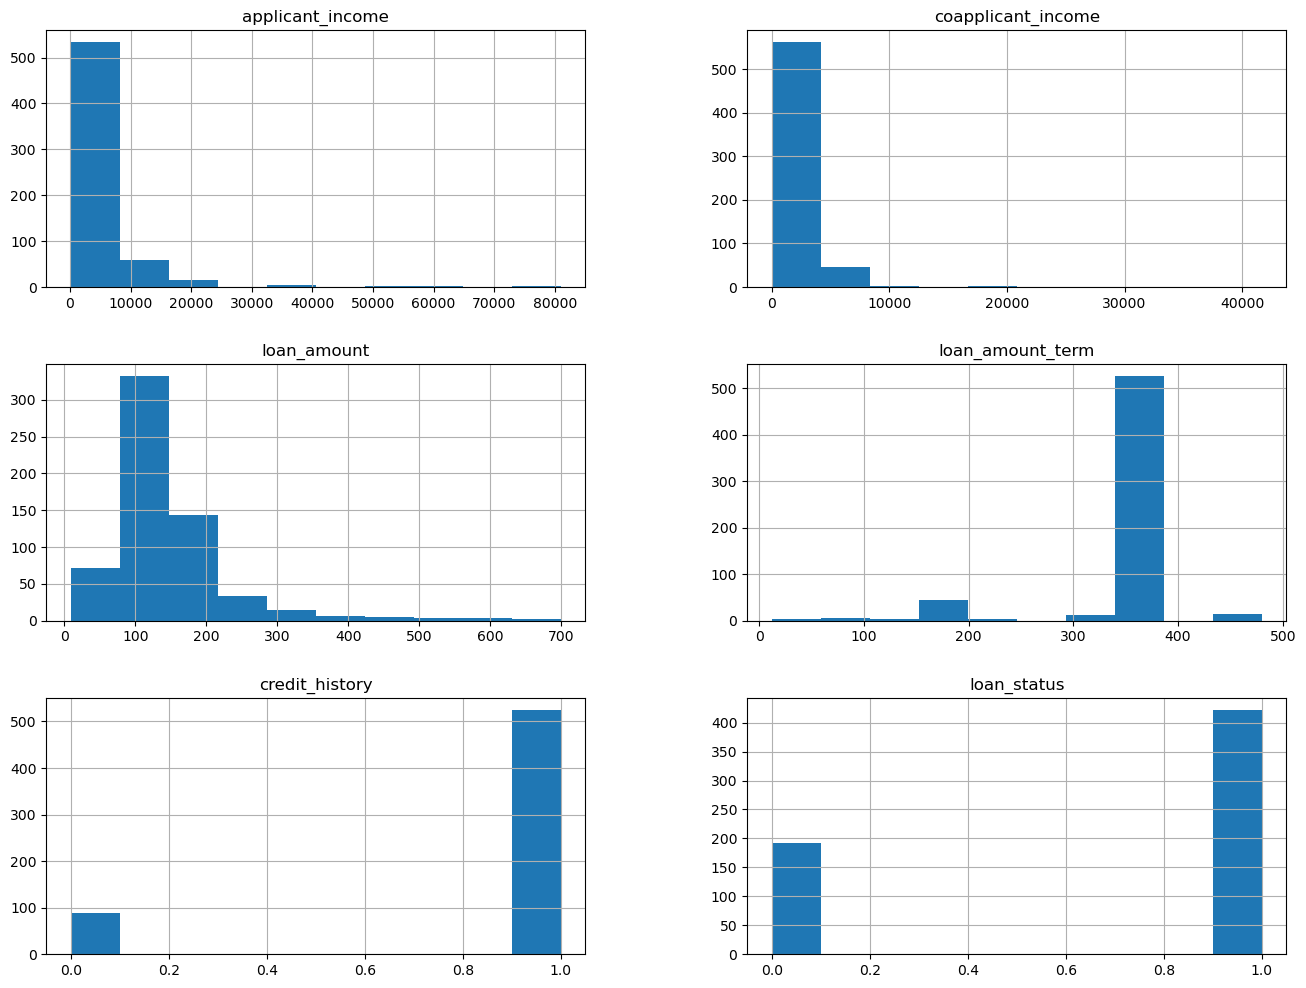

In [20]:
# From the histogram below we can see that the columns "coapplicant_income" and "applicant_income" are rightly skewed just like
# the dataframe.describe has indicated that there might be extreme values in those columns, we can still explore this further
df1[numerical_cols].hist(figsize=(16, 12));

In [21]:
# "coapplicant_income" and "applicant_income" columns have the highest skewed values
df1[numerical_cols].skew().sort_values(ascending= False)

coapplicant_income    7.491531
applicant_income      6.539513
loan_amount           2.743053
loan_status          -0.809998
credit_history       -2.021971
loan_amount_term     -2.402112
dtype: float64

In [22]:
skewed_cols = ["coapplicant_income", "applicant_income", "loan_amount"]

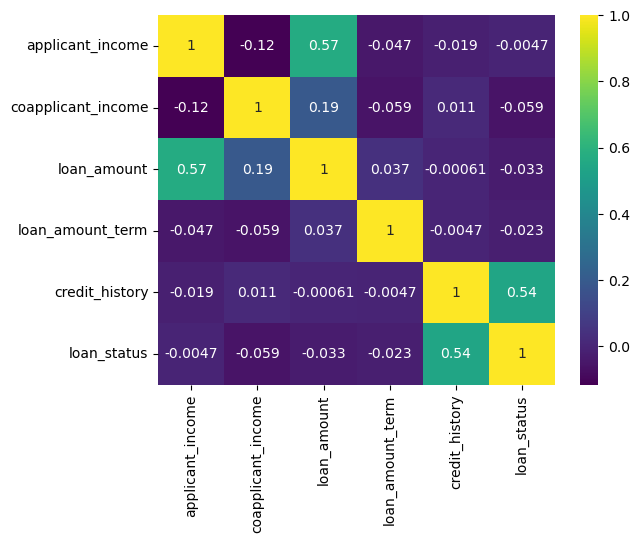

In [23]:
# The heatmap below shows that credit history has a positive correlation with loan status, and the loan amount has a
# positive correlation with applicant income.  
sns.heatmap(data=df1.corr(), cmap="viridis", annot=True);

In [24]:
# Checking for outliers in the dataset
def outliers_func():
        outliers_cols = []
    
        for col in df1.select_dtypes("number"): 
            q1 = df1[col].quantile(.25)
            q3 = df1[col].quantile(.75)
            iqr = q3 - q1
            lower_out= (df1[col] < (q1 - (1.5*iqr))).sum()
            upper_out = (df1[col]  > (q3 + (1.5*iqr))).sum()

            if lower_out > 0 or upper_out > 0 :
                outliers_cols.append(col)

        return outliers_cols

In [25]:
# calling the outliers function
outlier_columns = outliers_func()

In [26]:
outlier_columns

['applicant_income',
 'coapplicant_income',
 'loan_amount',
 'loan_amount_term',
 'credit_history']

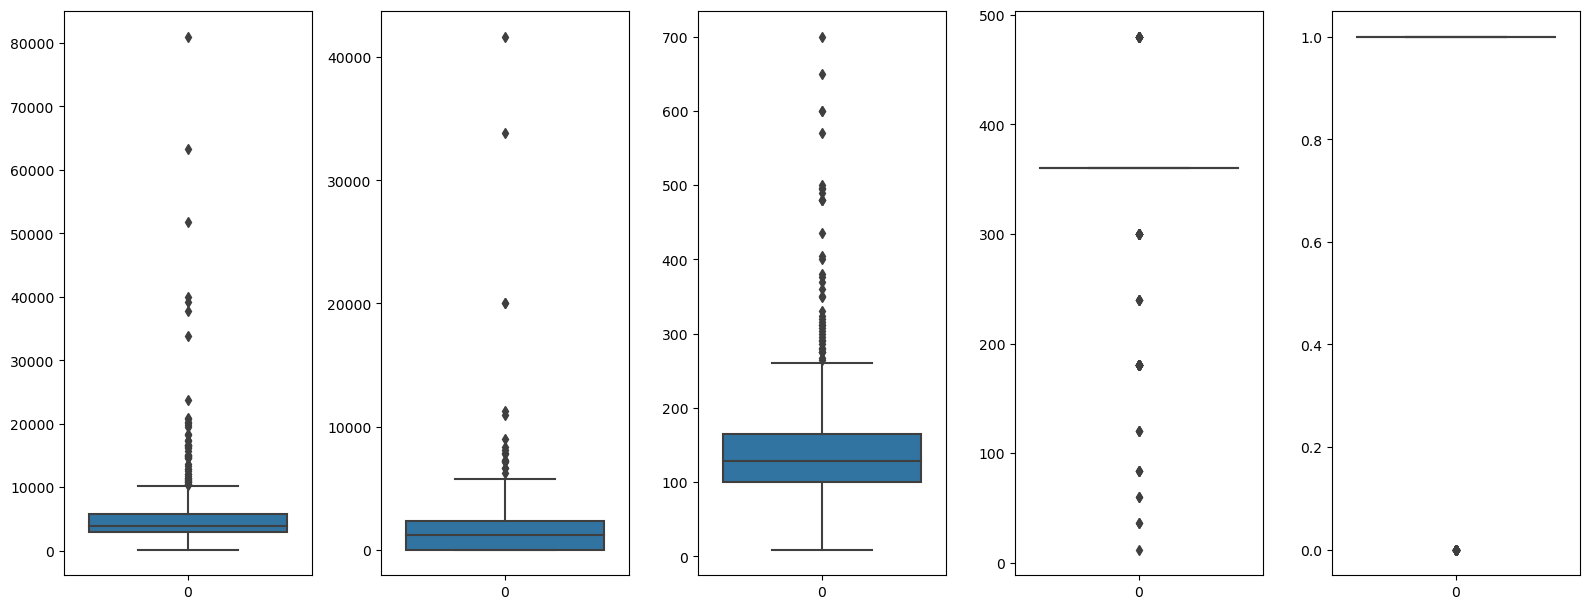

In [27]:
# Visualizing the boxplot for the columns with outliers

plt.figure(figsize=(16,12))
for index, col in enumerate(outlier_columns):
    plt.subplot(2,5, index+1)
    sns.boxplot(df1[col])
plt.tight_layout()
plt.show()

In [28]:
# I transformed the categorical columns using pandas get_dummies method to explore the correlation between variables
categorical_col = df1.select_dtypes("object")
categorical_col = categorical_col.drop("loan_id", axis=1)
categorical_col = pd.get_dummies(categorical_col)

In [29]:
categorical_col.head()

,gender_Female,gender_Male,married_No,married_Yes,dependents_0,dependents_1,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [30]:
# Checking the correlation between the target variable "loan status" and the transformed categorical variables shows that
# there is positive relationship between some columns but the "property_area_semiurban" is more correlated
categorical_col["loan_status"] = df1["loan_status"]
round(categorical_col.corr()["loan_status"].sort_values(ascending=False), 2)

loan_status                1.00
property_area_Semiurban    0.14
married_Yes                0.09
education_Graduate         0.09
dependents_2               0.06
gender_Male                0.02
self_employed_No           0.00
dependents_0              -0.00
self_employed_Yes         -0.00
gender_Female             -0.02
dependents_3+             -0.03
dependents_1              -0.04
property_area_Urban       -0.04
education_Not Graduate    -0.09
married_No                -0.09
property_area_Rural       -0.10
Name: loan_status, dtype: float64

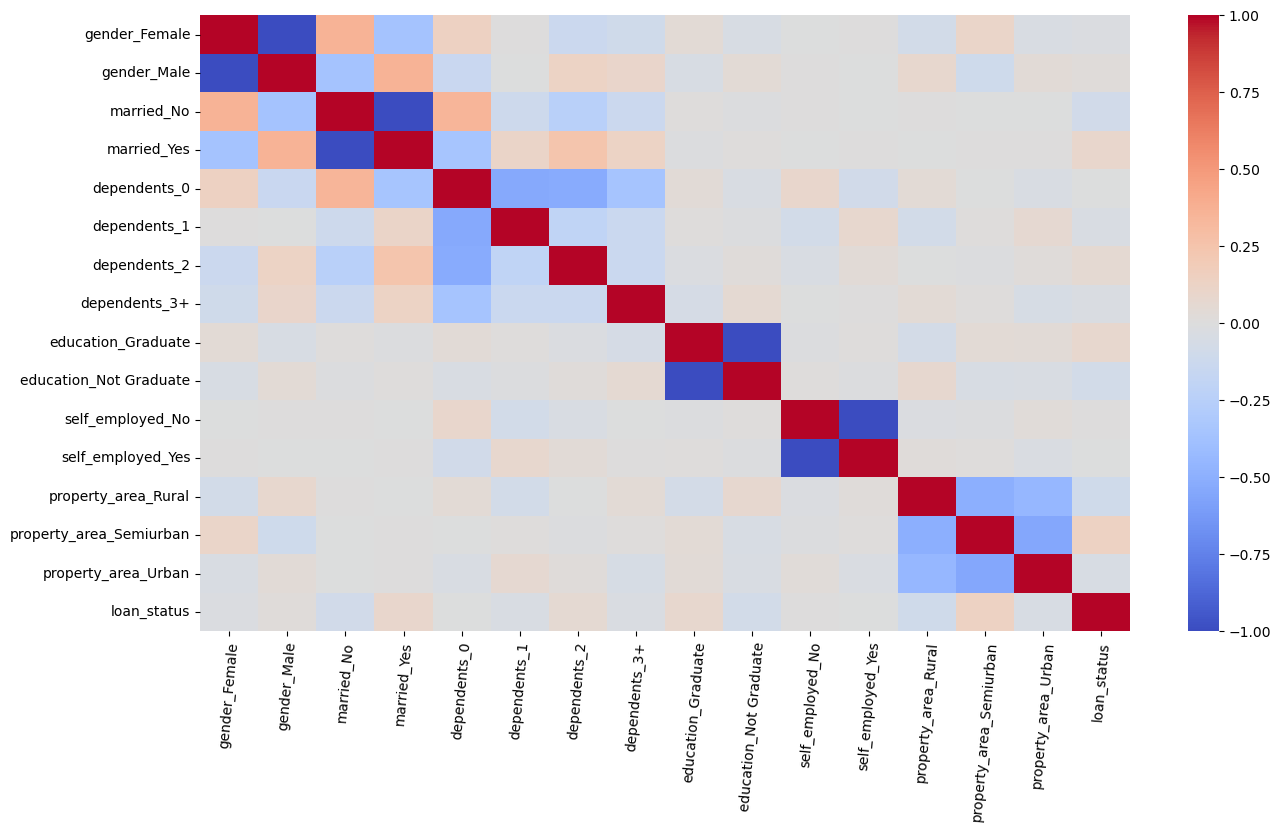

In [31]:
# Heatmap showing the correlation between target variables and transformed categoricalcolumns 
plt.figure(figsize=(15, 8))
sns.heatmap(categorical_col.corr(), cmap="coolwarm")
plt.xticks(rotation = 85);

### Data preprocessing Stage

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
# Transforming the skewed columns
df1[skewed_cols] = df1[skewed_cols].apply(lambda x: np.log(x + 1))

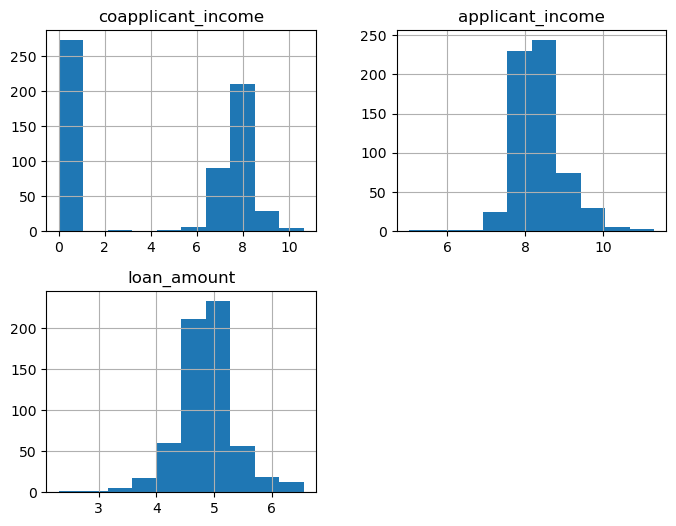

In [34]:
# The figure below shows that the columns have been transformed nicely
df1[skewed_cols].hist(figsize=(8, 6));

In [35]:
# Scaling the columns with outliers
df1[outlier_columns] = scaler.fit_transform(df1[outlier_columns])
df1[outlier_columns]

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history
0,0.516186,-1.107783,-0.012803,0.273231,0.411733
1,0.137806,0.782158,-0.012803,0.273231,0.411733
2,-0.519479,-1.107783,-1.348663,0.273231,0.411733
3,-0.751605,0.897526,-0.143351,0.273231,0.411733
4,0.555727,-1.107783,0.182981,0.273231,0.411733
...,...,...,...,...,...
609,-0.572062,-1.107783,-1.201901,0.273231,0.411733
610,-0.032679,-1.107783,-2.350110,-2.522836,0.411733
611,1.015921,0.308483,1.368737,0.273231,0.411733
612,0.918972,-1.107783,0.755185,0.273231,0.411733


In [36]:
# Data Transformation for Categorical columns in the dataframe
# Dropping the "loan_id column"
df1 = df1.drop("loan_id", axis=1)

In [37]:
df1 = pd.get_dummies(df1)
df1.head()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,loan_status,gender_Female,gender_Male,married_No,married_Yes,...,dependents_1,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,0.516186,-1.107783,-0.012803,0.273231,0.411733,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,0.137806,0.782158,-0.012803,0.273231,0.411733,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,-0.519479,-1.107783,-1.348663,0.273231,0.411733,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,-0.751605,0.897526,-0.143351,0.273231,0.411733,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,0.555727,-1.107783,0.182981,0.273231,0.411733,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


## Modelling

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [39]:
# split dataset into training and testing data
target = df1["loan_status"]
predictor_variables = df1.drop("loan_status", axis=1)

In [40]:
target.value_counts()

1    422
0    192
Name: loan_status, dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(predictor_variables, target, test_size= 0.2, random_state= 42)

In [42]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(491, 20) (123, 20)
(491,) (123,)


In [43]:
# Putting models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "DecisionTree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC()
}

In [44]:
# Setting up a function to fit, predict and score model
def fit_predict_and_score(models, X_train, X_test, y_train, y_test):
    "This fuction fit, predict and score the models using accuracy score"
    # making a dictionary to to keep model scores
    model_scores = {}
    
    # looping through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        training_predict = model.predict(X_train)
        testing_predict = model.predict(X_test)
        training_accuracy = accuracy_score(training_predict, y_train)
        testing_accuracy = accuracy_score(testing_predict, y_test)
        model_scores[name] = f" has a  score of {training_accuracy} on training set and a score of {testing_accuracy} on testing set"
    return model_scores
        

In [45]:
# The logistic Regression and the SVC(support Vector Classifier) perform better among the models
fit_predict_and_score(models, X_train, X_test, y_train, y_test)

{'Logistic Regression': ' has a  score of 0.8126272912423625 on training set and a score of 0.7886178861788617 on testing set',
 'DecisionTree Classifier': ' has a  score of 1.0 on training set and a score of 0.6910569105691057 on testing set',
 'Random Forest': ' has a  score of 1.0 on training set and a score of 0.7723577235772358 on testing set',
 'SVC': ' has a  score of 0.8329938900203666 on training set and a score of 0.7804878048780488 on testing set'}

### Evaluating model performance
I evaluated the performance of the two models that have better score on the test dataset

In [46]:
# Evaluating model performance
TP = target.sum() 
FP = target.shape[0]- TP # type 1 error 
TN = 0
FN = 0 # Type 2 error 

precision = TP / TP + FP

Recall = TP / TP + FN

Accuracy = (TP + TN)/TP + FN + TN + FP

In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_prediction = logreg.predict(X_test)

In [48]:
logreg_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [49]:
# Evaluating the model with 5 fold cross validation
cross_val_score(logreg, X_train, y_train, cv = 5, scoring = "accuracy")

array([0.84848485, 0.80612245, 0.81632653, 0.78571429, 0.80612245])

In [50]:
y_predict = cross_val_predict(logreg, X_test, y_test, cv = 5)

In [51]:
confusion_matrix(y_predict, y_test)

array([[19,  4],
       [24, 76]], dtype=int64)

In [52]:
# Classification report
print(classification_report(y_test, logreg_prediction))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [53]:
SVC = SVC()
SVC.fit(X_train, y_train)
SVC_prediction = SVC.predict(X_test)

In [54]:
confusion_matrix(y_predict, y_test)

array([[19,  4],
       [24, 76]], dtype=int64)

In [55]:
# Classification report
print(classification_report(y_test, SVC_prediction))

              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



Both models perform better with classifying the dataset into customers that are eligible to collect loan than classifying customers that are not elligible for loan collection 

In [56]:
# accuracy_svc_train = accuracy_score(support.predict(X_train), y_train)
# accuracy_svc_test = accuracy_score(support.predict(X_test), y_test)

#### Hyperparameter tuning

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
#grid_param = {"n_estimators":[100,200,300] , "max_features" : [2,4,6], "min_samples_split" : [2,5]}

In [59]:
LogisticRegression()

LogisticRegression()

In [61]:
#Setting hyperparameters for logistic regression model tuning
param_grid = [{"penalty" : ["l2"],
              "C" : np.logspace(-4, 4, 50),
               "solver" : ["lbfgs", "newton-cg", "liblinear", "sag", "saga"],
              "max_iter" : [100, 1000, 2500, 5000]}]
# param_grid = [{"penalty": ["l2"],
#               "C": [1.0],
#               "solver": ["lbfgs"],
#               "max_iter": [100, 1000, 2500, 5000]}]

In [62]:
grid_model = GridSearchCV(logreg, param_grid= param_grid, cv= 3, verbose= True, n_jobs= -1)

In [63]:
grid_model.fit(X_train, y_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l2'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [64]:
grid_model.best_estimator_.score(X_test , y_test)

0.7886178861788617

The model performance did not really improved from the original score of 0.788